In [1]:
import json, re

from datetime import datetime
from pathlib import Path

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme(style="white", context="talk")

In [3]:
result_paths = list(Path("../data/").glob("*-experiments/cl/**/results*.json"))
results = []
for p in result_paths:
    with open(p, "r") as fp:
        data = json.load(fp)
    noise_path = list(p.parent.glob("folder*.json"))[0]    
    for score in data["scores"]:
        results.append({
            "noise_path": noise_path.name,
            "noise_rate": re.findall(r"\d+\.\d+", noise_path.name)[0],
            "algorithm_name": data["algorithm_name"],
            "algorithm_n_folds": data["algorithm_params"]["n_folds"],
            "algorithm_n_repetitions": data["algorithm_params"]["n_repetitions"],
            "start_time": datetime.strptime(data["start_time"], "%Y-%m-%dT%H:%M:%S%fZ"),
            "end_time": datetime.strptime(data["end_time"], "%Y-%m-%dT%H:%M:%S%fZ"),
            "type_1_error_rate": score["type_1_error_rate"],
            "type_2_error_rate": score["type_2_error_rate"],
            "noise_elimination_precision_score": score["noise_elimination_precision_score"],
        })

In [4]:
df_data = pd.DataFrame(results)
df_data["duration_min"] = np.round((df_data["end_time"] - df_data["start_time"]) / pd.Timedelta(minutes=1))

In [5]:
df_data.sort_values("noise_rate", inplace=True)

## Noise Elimination Precision

Noise elimination precision (NEP) is the percentage of detected instances that are known to be mislabelled.

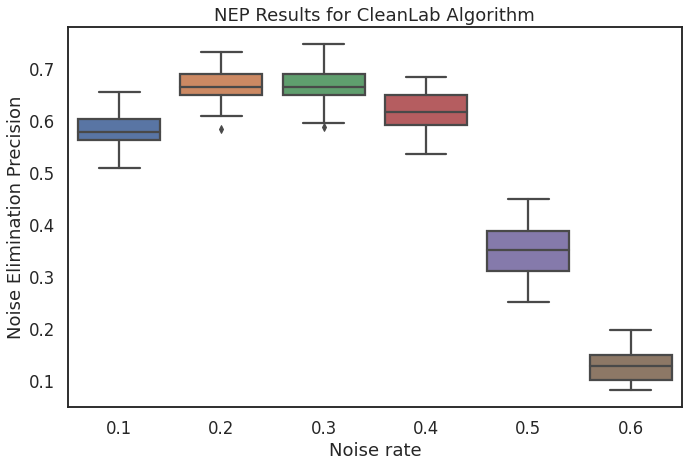

In [6]:
fig, ax = plt.subplots(figsize=(11, 7))
sns.boxplot(x="noise_rate", y="noise_elimination_precision_score", data=df_data, ax=ax)
ax.set_xlabel("Noise rate")
ax.set_ylabel("Noise Elimination Precision")
ax.set_title("NEP Results for CleanLab Algorithm");

## Error Types

For noisy label detection algorithms, we want to determine whether the samples predicted as being noisy actually are mislabeled instances, and vice versa. We can distinguish between two types of errors. We say we say that an algorithms makes an:

- **Type 1 error** if the algorithm mistakenly identified a correctly labelled sample as mislabelled i.e., false postive / false alarm. Type 1 Error Rate, denoted $ER_1$, is computed as:

  $$
  ER_1=
  \frac{
    \text{# of correctly labelled samples wrongly detected as mislabelled}
  }{
    \text{# of correctly labelled samples}
  }
  $$
- **Type 2 error** if the algorithm did not identify an actually mislabelled instance in the data set i.e., false negative. Type 2 Error Rate, denoted $ER_2$, is computed as:

  $$
  ER_2=
  \frac{
    \text{# of undetected but known mislabelled samples}
  }{
    \text{# of known mislabelled samples}
  }
  $$


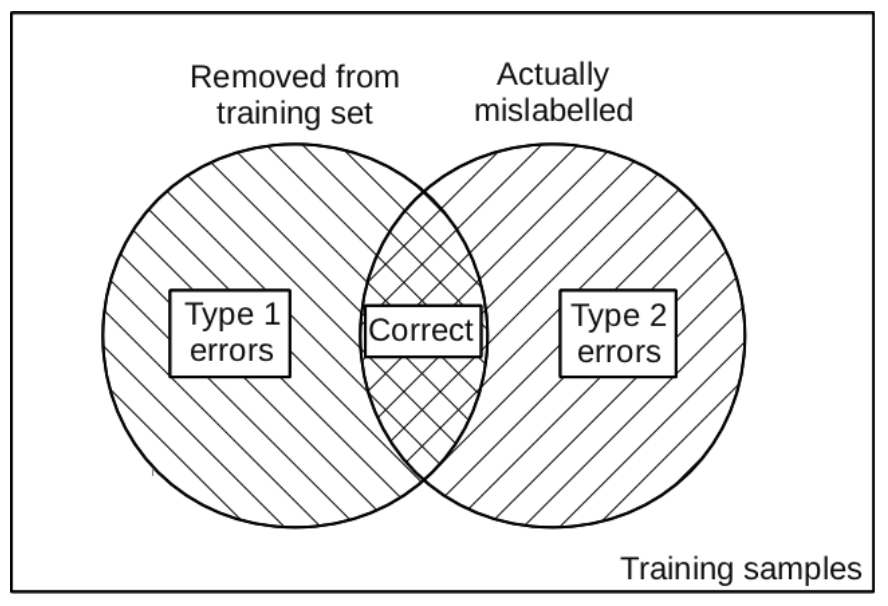


## Type 1 Error Rates

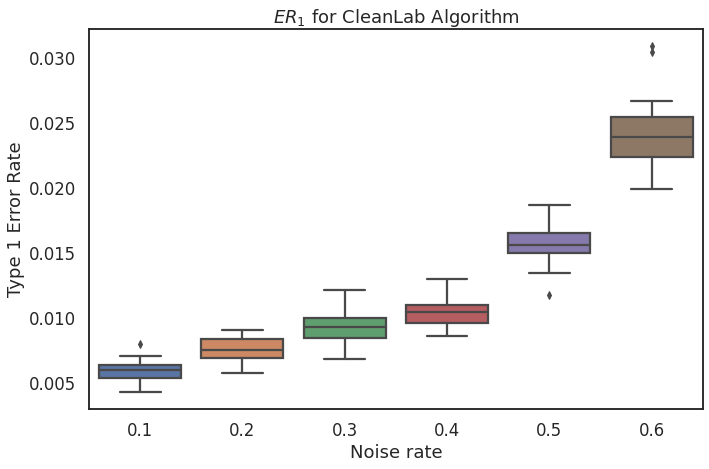

In [7]:
fig, ax = plt.subplots(figsize=(11, 7))
sns.boxplot(x="noise_rate", y="type_1_error_rate", data=df_data, ax=ax)
ax.set_xlabel("Noise rate")
ax.set_ylabel("Type 1 Error Rate")
ax.set_title("$ER_1$ for CleanLab Algorithm");

## Type 2 Error Rates

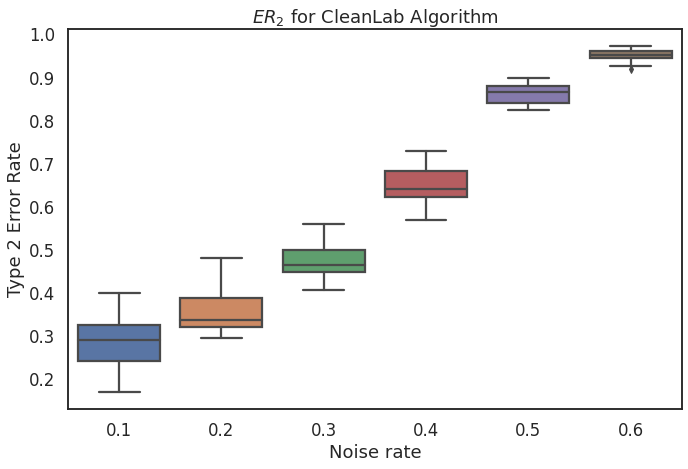

In [8]:
fig, ax = plt.subplots(figsize=(11, 7))
sns.boxplot(x="noise_rate", y="type_2_error_rate", data=df_data, ax=ax)
ax.set_xlabel("Noise rate")
ax.set_ylabel("Type 2 Error Rate")
ax.set_title("$ER_2$ for CleanLab Algorithm");